Importing standard modules for the data analysis

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
pd.options.display.max_columns=100

Read-in datasets for two states each on the Southwen and Northern borders.

In [120]:
mt = pd.read_csv('MT-clean.csv', index_col='id', low_memory=False)
az = pd.read_csv('AZ-clean.csv', index_col='id', low_memory=False)
tx = pd.read_csv('TX-clean.csv', index_col='id', low_memory=False)
wa = pd.read_csv('WA-clean.csv', index_col='id', low_memory=False)

How many records does each state have?

In [121]:
print('Monthana:',len(mt), '\nWashington:',len(wa), '\nArizona:', len(az), '\nTexas:',len(tx))

Monthana: 825118 
Washington: 8624032 
Arizona: 2251992 
Texas: 23397249


Define functions for some of the date/year/month manipulations.

In [122]:
def DayMonthYear(df):
    df['stop_date'] = pd.to_datetime(df['stop_date'], format = "%Y-%m-%d")
    df['stop_year'] = df['stop_date'].dt.year
    df['stop_month'] = df['stop_date'].dt.month
    df['stop_day'] = df['stop_date'].dt.day
    return df

def YearlyStats(df):
    yearly_stats = df.groupby('stop_year')['state'].value_counts()
    yearly_stats = pd.DataFrame({'Stop_year':yearly_stats.index.levels[0], 'NumberofStops':yearly_stats.values})
    return yearly_stats

def MonthlyStats(df):
    monthly_stats = df.groupby('stop_month')['state'].value_counts()
    monthly_stats = pd.DataFrame({'Stop_month':monthly_stats.index.levels[0], 'NumberofStops':monthly_stats.values})
    Month = pd.DataFrame(data={'Month':['January', 'February', 'March', 'April', 'May', 'June', 'July', 
                   'August', 'September', 'October', 'November', 'December']})
    monthly_stats = pd.concat([monthly_stats, Month], axis=1)
    return monthly_stats

def DailyStats(df):
    daily_stats = df.groupby('stop_day')['state'].value_counts()
    daily_stats = pd.DataFrame({'Stop_day':daily_stats.index.levels[0], 'NumberofStops':daily_stats.values})

What columns are common between these datasets?

In [123]:
from functools import reduce
common_cols = reduce(np.intersect1d,[mt.columns,tx.columns,az.columns,wa.columns])
common_cols

array(['contraband_found', 'county_fips', 'county_name', 'driver_age',
       'driver_age_raw', 'driver_gender', 'driver_race',
       'driver_race_raw', 'fine_grained_location', 'is_arrested',
       'location_raw', 'police_department', 'search_conducted',
       'search_type', 'search_type_raw', 'state', 'stop_date',
       'stop_outcome', 'stop_time', 'violation', 'violation_raw'],
      dtype=object)

In [124]:
mt = DayMonthYear(mt)
az = DayMonthYear(az)
tx = DayMonthYear(tx)
wa = DayMonthYear(wa)

Number of Years for which data is available from each state

In [125]:
print('Montana:',mt['stop_year'].nunique(),\
      '\nWashington:', wa['stop_year'].nunique(),\
      '\nArizona:', az['stop_year'].nunique(),\
      '\nTexas:', tx['stop_year'].nunique())

Montana: 8 
Washington: 8 
Arizona: 7 
Texas: 10


In [126]:
def CountyCounts(df):
    counts = df.groupby(['county_fips'])['stop_outcome'].count()
    counts = pd.DataFrame({'County_fips':counts.index.astype('int64'),'NumberOfStops':counts.values})
    return counts

In [127]:
All_county_counts = pd.concat([CountyCounts(mt),CountyCounts(wa),CountyCounts(az),CountyCounts(tx)], axis=0)
All_county_counts.reset_index(drop=True, inplace=True)

Let's take a quick look at how the traffic stops are distributed across each of these states

In [154]:
import plotly as py
import plotly.figure_factory as ff
pal = sns.color_palette("RdYlGn", n_colors=20)
colorscale = pal.as_hex()


fig = ff.create_choropleth(
    fips=All_county_counts['County_fips'], values=All_county_counts['NumberOfStops'], scope=['USA'],
    colorscale=colorscale,
    binning_endpoints=\
    list(np.arange(0,950000,50000)),
    plot_bgcolor='rgb(255,255,255)',
    state_outline={'color':'rgb(0,0,0)', 'width': 0.5},
    paper_bgcolor='rgb(255,255,255)',
    county_outline={'color': 'rgb(20,20,20)', 'width': 0.5}, round_legend_values=False,
    legend_title='Number of Traffic Stops by County', title='Texas, Arizona, Wahington and Montana'
)
py.offline.iplot(fig)

/Users/balaji/Documents/miniconda3/envs/Kaggle/lib/python3.6/site-packages/pandas/core/frame.py:6211: FutureWarning:

Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.




It is interesting to note that while the southern border at Texas is fairly heavily policed, only Maricopa county in Arizona is the target of heavy policing. On the other hand, the northern border in Washington is policed more heavily than the Montana border.  
Let's look to see if other patterns of policing emerge when we average data by month or day of the month 

In [161]:
mt_monthly = MonthlyStats(mt)
wa_monthly = MonthlyStats(wa)
az_monthly = MonthlyStats(az)
tx_monthly = MonthlyStats(tx)

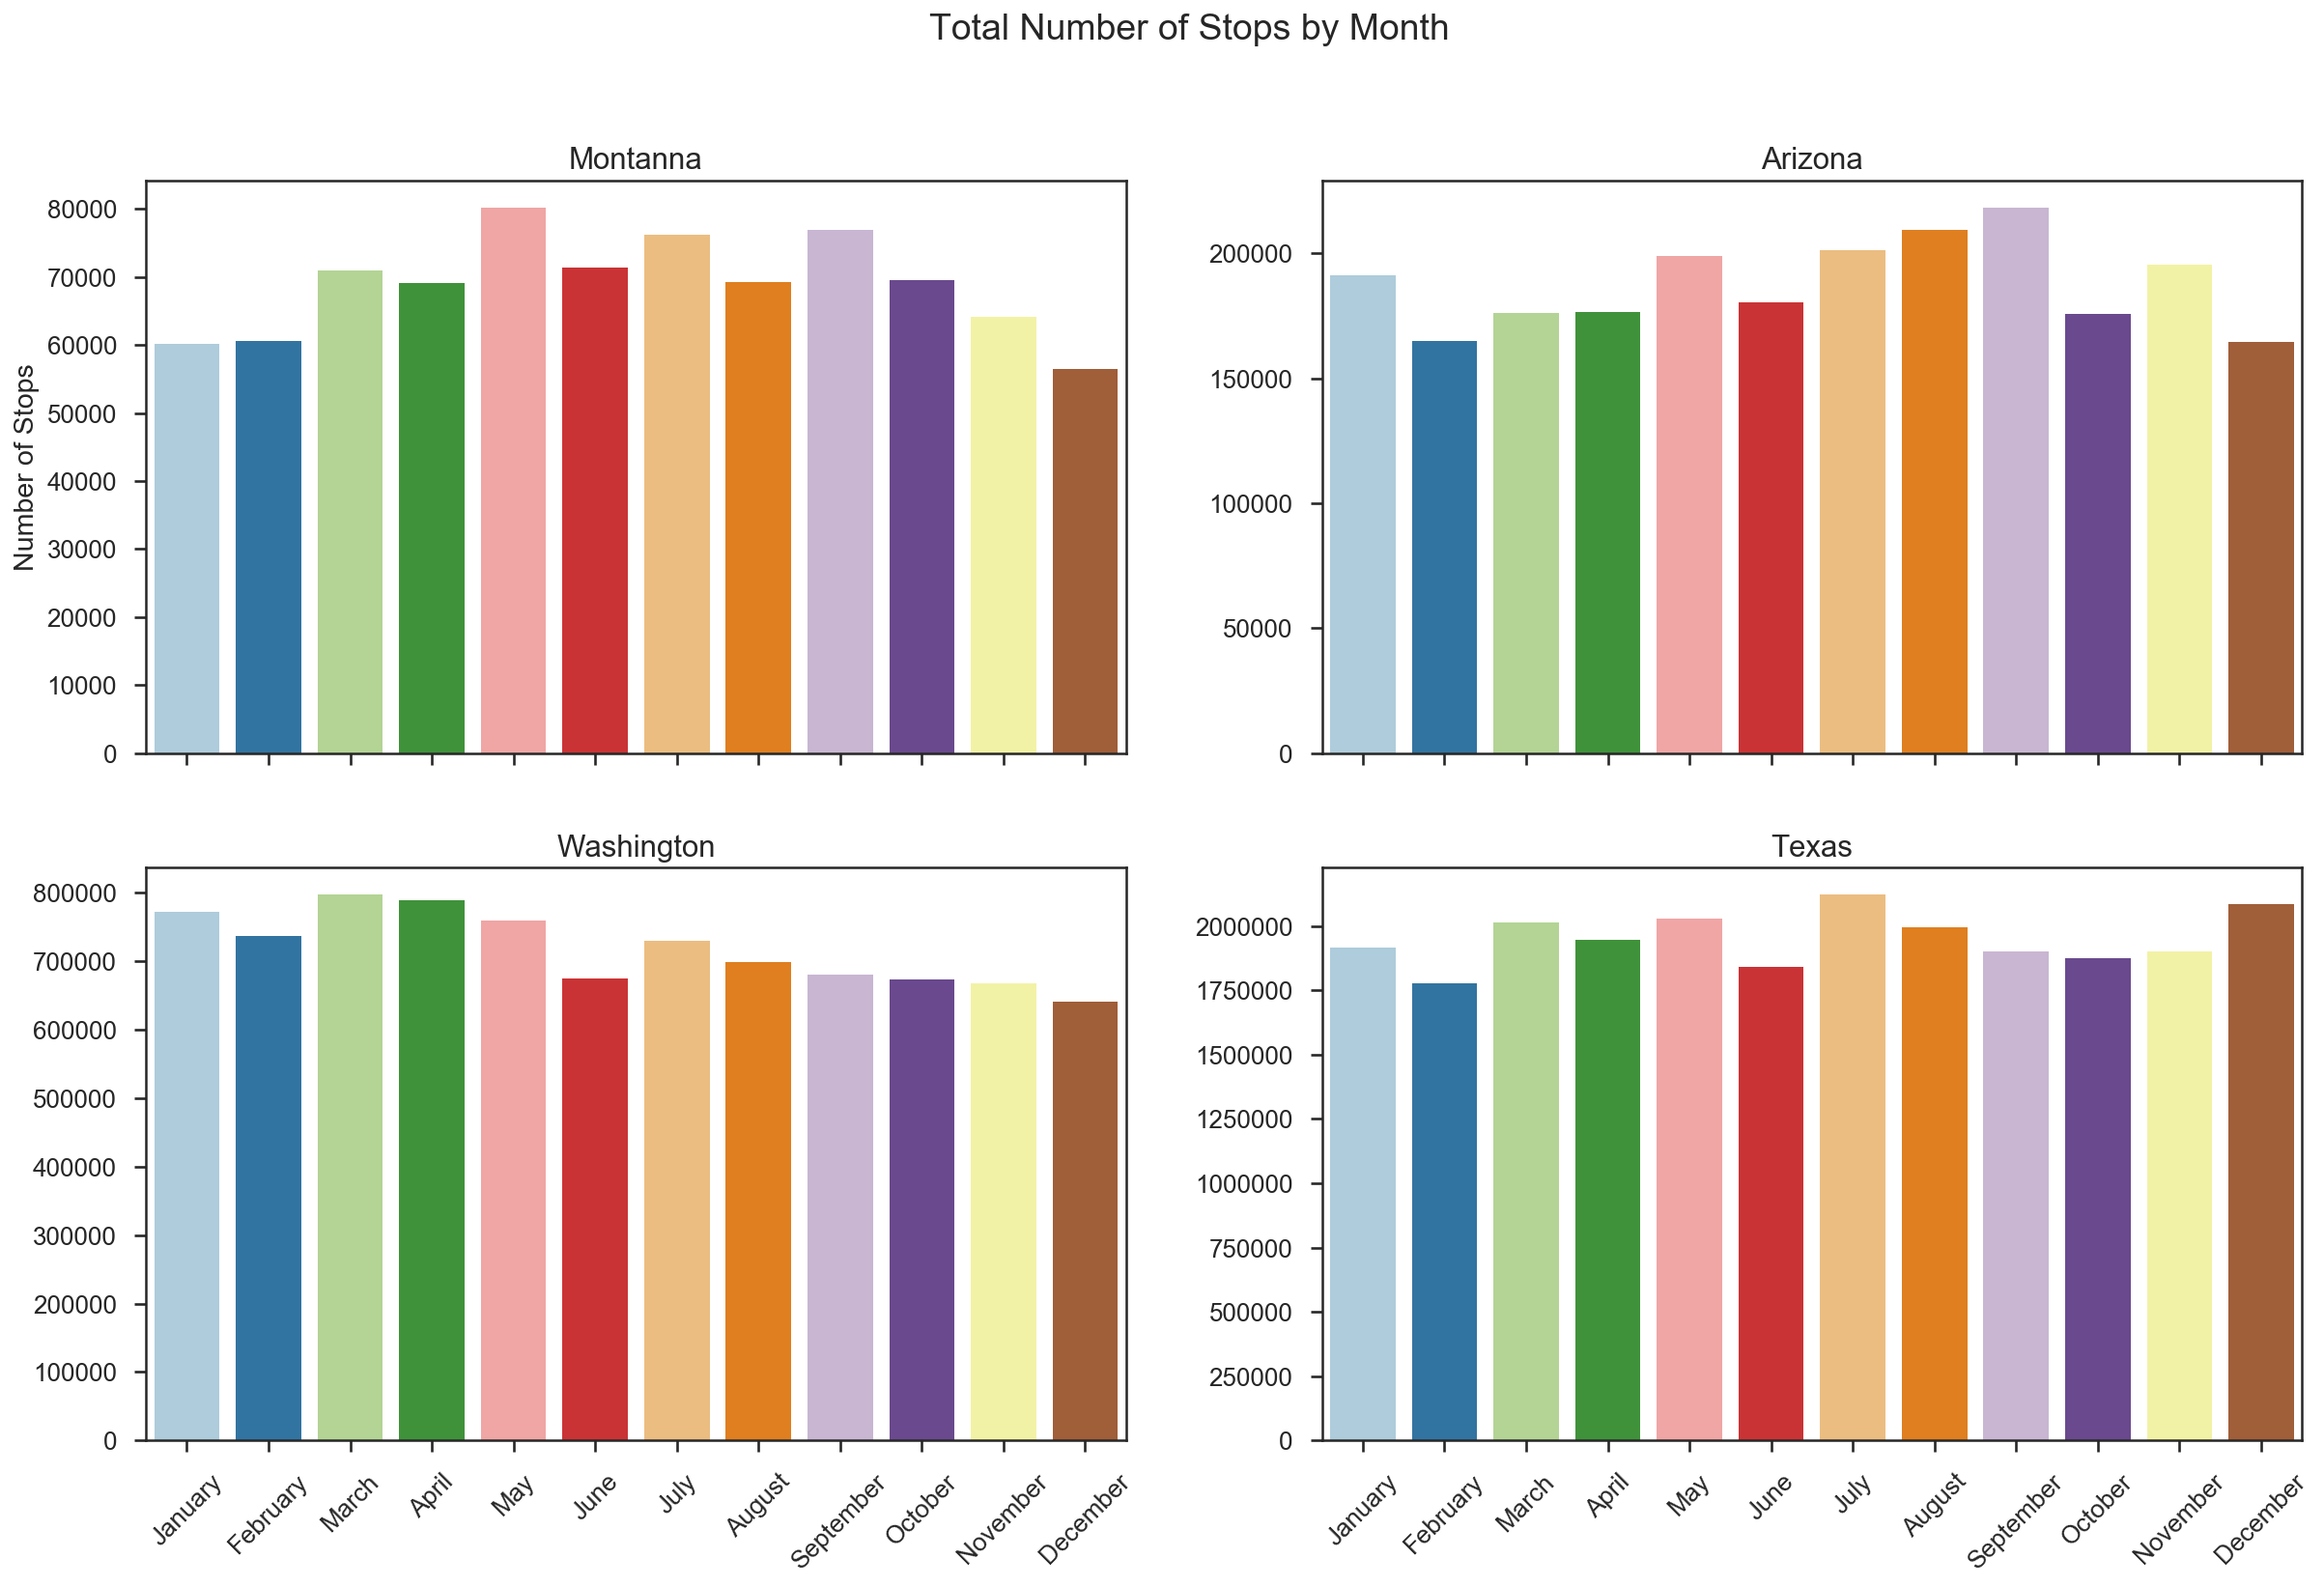

In [190]:
fig, ([ax1,ax3],[ax2,ax4]) = plt.subplots(nrows=2, ncols=2, figsize=(20,12), sharex=True,sharey=False)
plt.xticks(rotation=90)
ax1 = sns.barplot(x = 'Month',y = 'NumberofStops',data = mt_monthly, palette = 'Paired',ax = ax1)
ax1.set_title('Montanna')
ax1.set_ylabel("Number of Stops")
ax1.set_xlabel('')
ax2 = sns.barplot(x = 'Month',y = 'NumberofStops',data = wa_monthly, palette = 'Paired',ax = ax2)
ax2.set_title('Washington')
ax2.set_ylabel("")
ax2.set_xlabel('')
ax3 = sns.barplot(x = 'Month',y = 'NumberofStops',data = az_monthly, palette = 'Paired',ax = ax3)
ax3.set_title('Arizona')
ax3.set_xlabel('')
ax3.set_ylabel("")
ax4 = sns.barplot(x = 'Month',y = 'NumberofStops',data = tx_monthly, palette = 'Paired',ax = ax4)
ax4.set_xlabel('')
ax4.set_ylabel("")
ax4.set_title('Texas')
plt.suptitle("Total Number of Stops by Month")
for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=45)

The figure above shows distinct patterns in policing depending on month of the year.
1. Montanna shows distinct drop-offs in traffic stios during the winter which pick back up again during spring/summer
2. Arizona is similar to Montanna - higher number of traffic stops in summer with a drop-off during the winter months
3. Washington shows a pattern where the first-half of the year has more stops than the second half od the year.
4. Texas doesn't show many differences in policing aross the year.

Does age affect whether or not someone gets a ticket

Text(0.5,1,'Driver Age by Stop Outcome (Montanna)')

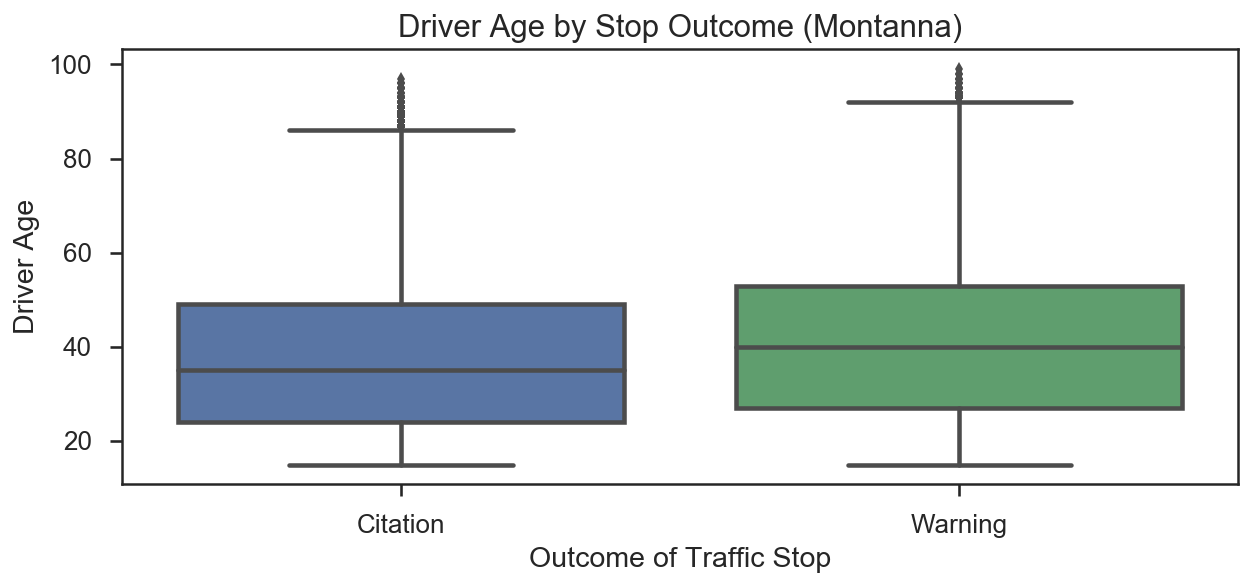

In [192]:
cite_or_warn = mt.loc[(mt['stop_outcome']=='Citation') | (mt['stop_outcome']=='Warning')]
plt.figure(figsize=(10,4))
sns.set(style="ticks",context="talk")
sns.boxplot(x='stop_outcome', y='driver_age', data=cite_or_warn)
plt.ylabel("Driver Age")
plt.xlabel("Outcome of Traffic Stop")
plt.title("Driver Age by Stop Outcome (Montanna)")

Data from the state of Montanna shows that age is a distinct factor that decides whether or not you get a Citation versus a warning.